In [518]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [408]:
df = pd.read_csv(r"C:\Users\91932\datascience\Cloudyml\kidney_disease.csv")

In [409]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [410]:
#shape
df.shape

(400, 26)

### Data set description
age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class

In [411]:
#checking info of columns and null values

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [413]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [414]:
(df.isnull().sum()/len(df))*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [415]:
#Data cleaning

In [416]:
#dropping unnecessary column
df.drop(columns='id',axis=1,inplace=True)

In [417]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [418]:
#renaming columns

In [419]:
d=["Age",
"blood pressure",
"specific_gravity",
"albumin",
"sugar",
"red_blood_cells",
"pus_cell",
"pus_cell_clumps",
"bacteria",
"blood_glucose_random",
"blood_urea",
"serum_creatinine",
"sodium",
"potassium",
"hemoglobin",
"packed_cell_volume",
"white_blood_cell_count",
"red_blood_cell_count",
"hypertension",
"diabetes_mellitus",
"coronary_artery_disease",
"appetite",
"pedal_edema",
"anemia",
"class",
]


In [420]:
df.columns=d

In [421]:
df.head()

,Age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


##### changing the datatypes 
1.float to object
2.object to float

In [422]:
df["specific_gravity"] = df["specific_gravity"].astype(object)

In [423]:
df["albumin"] = df["albumin"].astype(object)

In [424]:
df['sugar'] = df["sugar"].astype(object)

In [425]:
df["packed_cell_volume"].value_counts

<bound method IndexOpsMixin.value_counts of 0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object>

In [426]:
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"],errors='coerce')

In [427]:
df["packed_cell_volume"]

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [428]:
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"],errors='coerce')

In [429]:
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"],errors='coerce')

In [430]:
df

,Age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [431]:
#Extracting categorical and numerical columns
num_col = df.select_dtypes(exclude='object')

In [432]:
num_col

,Age,blood pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [433]:
cat_col = df.select_dtypes(include='object')

In [434]:
cat_col

,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.01,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.01,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [435]:
#checking the unique values of columns

In [436]:
for i in cat_col:
    print(f"{i} has {df[i].unique()}values")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025]values
albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0]values
sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0]values
red_blood_cells has [nan 'normal' 'abnormal']values
pus_cell has ['normal' 'abnormal' nan]values
pus_cell_clumps has ['notpresent' 'present' nan]values
bacteria has ['notpresent' 'present' nan]values
hypertension has ['yes' 'no' nan]values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]values
coronary_artery_disease has ['no' 'yes' '\tno' nan]values
appetite has ['good' 'poor' nan]values
pedal_edema has ['no' 'yes' nan]values
anemia has ['no' 'yes' nan]values
class has ['ckd' 'ckd\t' 'notckd']values


 ##The columns i.e diabetes_mellitus,coronary_artery_disease,class has approriate values like '\tno',' yes','\tyes' converting them into approriate like yes,no

In [437]:
df['diabetes_mellitus'].replace({" yes":"yes",'\tno':'no', '\tyes':'yes'},inplace=True)

In [438]:
df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)

In [439]:
df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [440]:
#checking if the values have been replaced.
for i in cat_col:
    print(f"{i} has {df[i].unique()}values")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025]values
albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0]values
sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0]values
red_blood_cells has [nan 'normal' 'abnormal']values
pus_cell has ['normal' 'abnormal' nan]values
pus_cell_clumps has ['notpresent' 'present' nan]values
bacteria has ['notpresent' 'present' nan]values
hypertension has ['yes' 'no' nan]values
diabetes_mellitus has ['yes' 'no' nan]values
coronary_artery_disease has ['no' 'yes' nan]values
appetite has ['good' 'poor' nan]values
pedal_edema has ['no' 'yes' nan]values
anemia has ['no' 'yes' nan]values
class has ['ckd' 'notckd']values


In [441]:
#Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)

In [442]:
df['class'].replace({'ckd':0,'notckd':1},inplace=True)

In [443]:
# coverting target col into numeric to check correlation
df['class']= pd.to_numeric(df["class"])

#### EDA

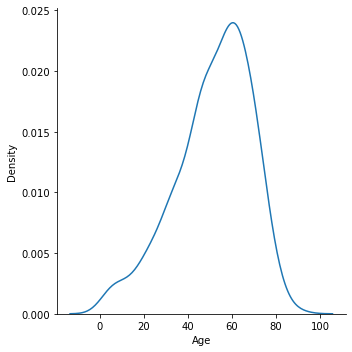

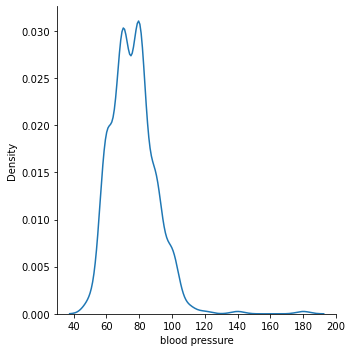

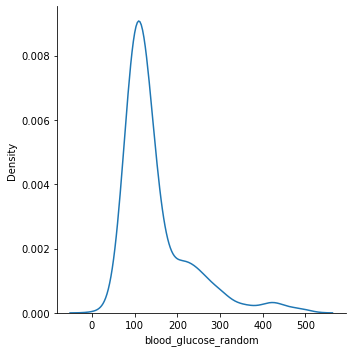

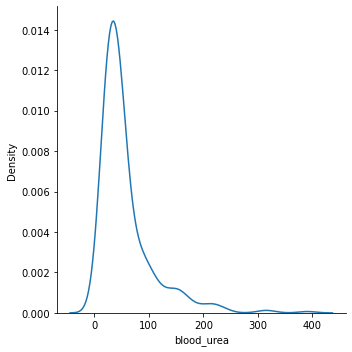

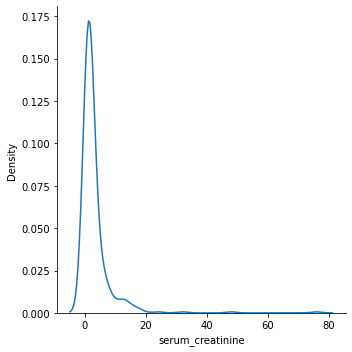

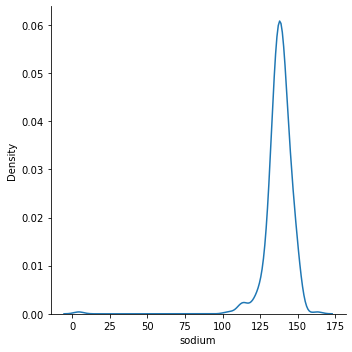

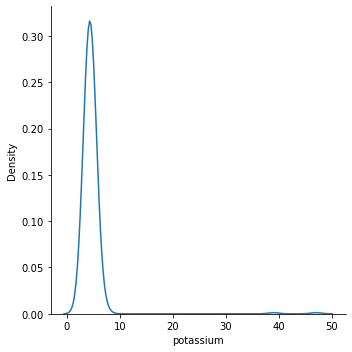

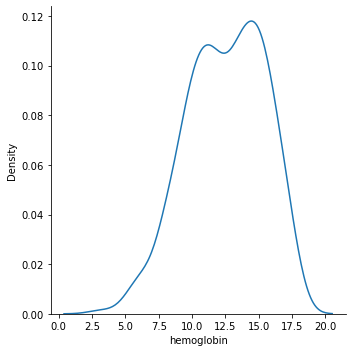

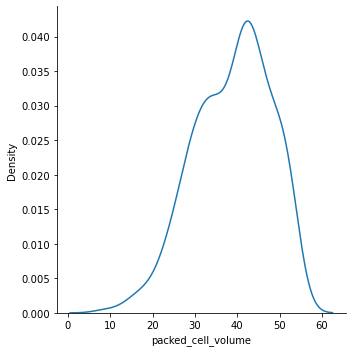

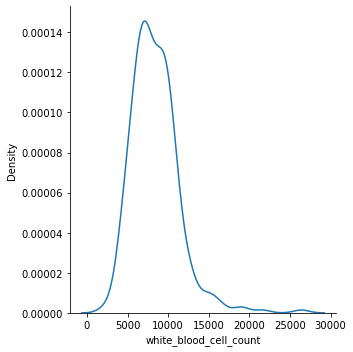

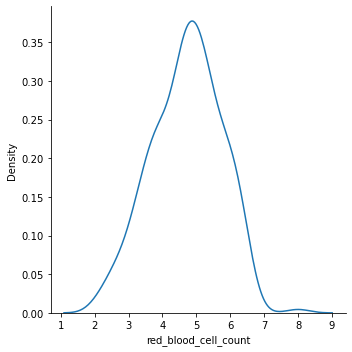

In [444]:
# checking numerical features distribution
for i in num_col:
    sns.displot(data=df,x=df[i],kind="kde")
    plt.show()

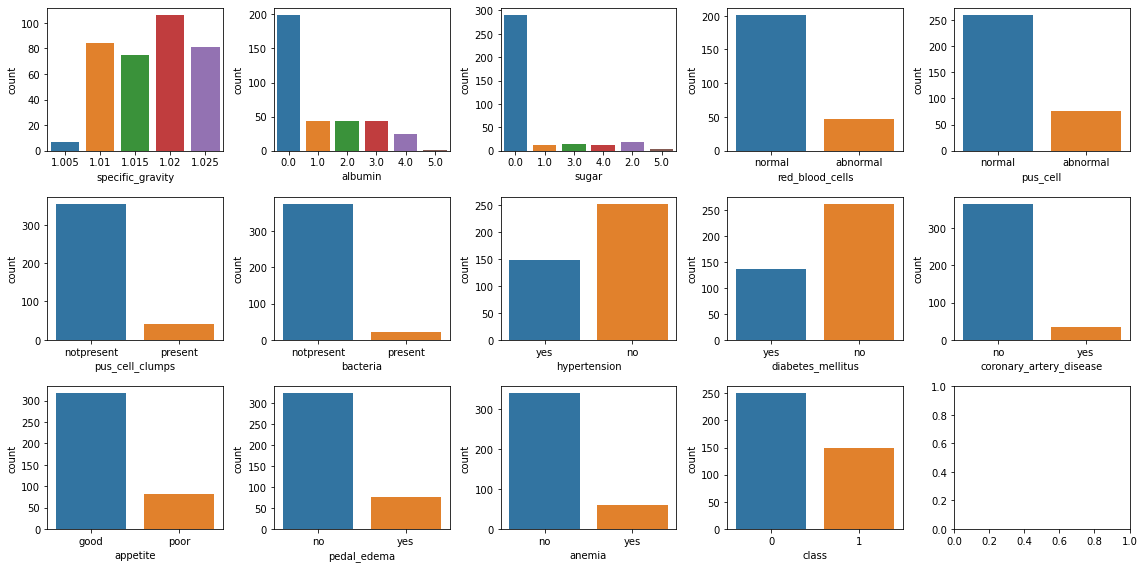

In [445]:
# create the figure and axes
#ravel is used to flattened array
#axes is the flattened array

fig, axes = plt.subplots(3, 5, figsize=(16,8))
axes=axes.ravel()
for col,ax in zip(cat_col,axes):
    sns.countplot(data=df,x=col,ax=ax)
    fig.tight_layout()

<AxesSubplot:>

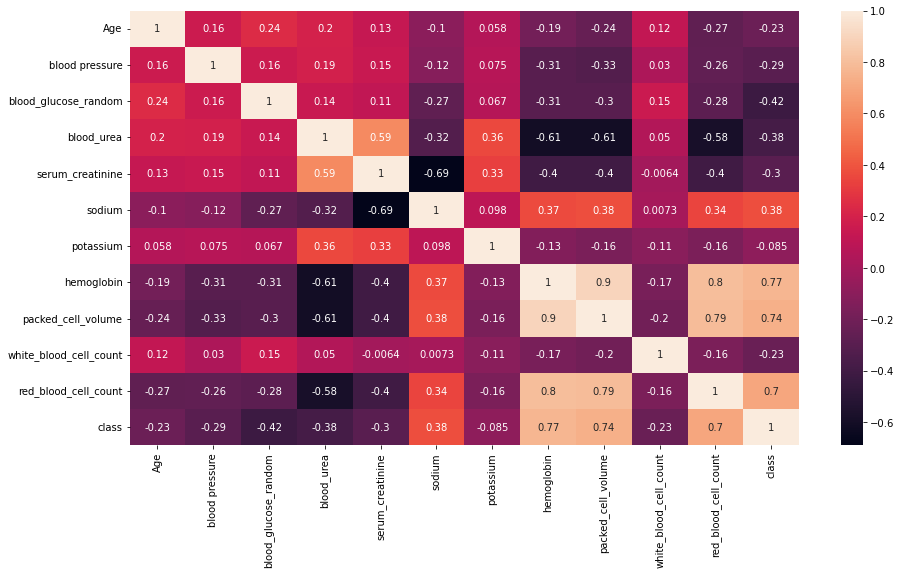

In [446]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True)

In [447]:
# let's check count of null values in whole df
df.isna().sum()

Age                          9
blood pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [448]:
# let's check count of null values in cat_cols
cat_col.isna().sum()

specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [449]:
# let's check count of null values in cat_cols
num_col.isna().sum()

Age                         9
blood pressure             12
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [450]:
#Percentage of null values
(df.isnull().sum()/len(df))*100

Age                         2.25
blood pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

<AxesSubplot:>

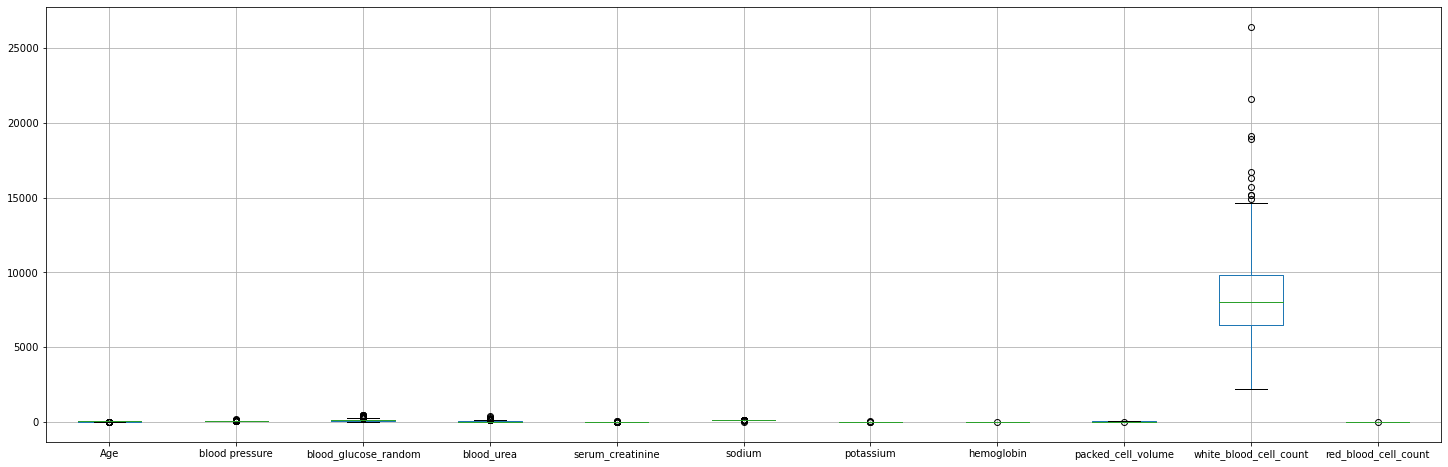

In [451]:
plt.figure(figsize = (25, 8))
num_col.boxplot()

In [452]:


#### Filling the null values in Age column with median:

df["Age"].fillna(df["Age"].median(), inplace=True)





In [453]:
df

,Age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


#### Vizualising EDA

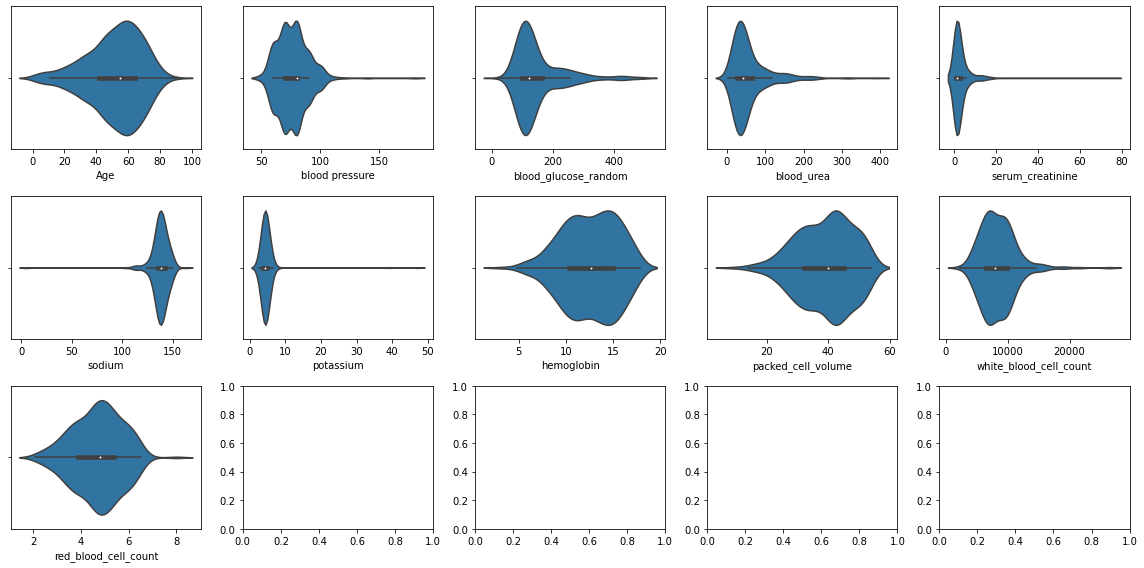

In [454]:
fig, axes = plt.subplots(3,5, figsize = (16,8))
ax = axes.ravel()

for col, ax in zip(num_col, ax):
    sns.violinplot(data=df,x=col,ax=ax)
    fig.tight_layout()

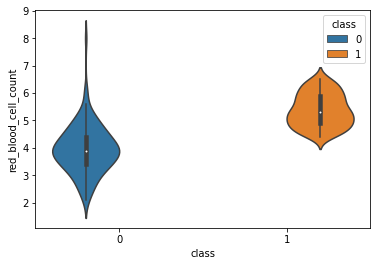

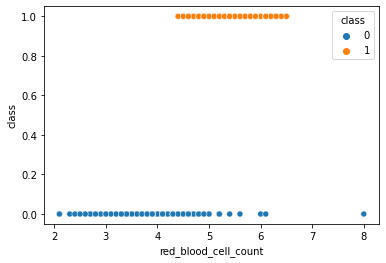

In [455]:
def violin(col):
    sns.violinplot(data=df,x='class',y=col,hue='class')
    plt.show()
def scatter(col):
    sns.scatterplot(data=df,x=col,y='class',hue='class')
    plt.show()
    
violin("red_blood_cell_count")
scatter("red_blood_cell_count")

In [456]:
df['red_blood_cells'].value_counts()

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

In [458]:
#replacing nan values with mode 

df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0], inplace=True)

In [459]:
#changing datatype object to float or int
df[['red_blood_cells','pus_cell']]=df[['red_blood_cells','pus_cell']].replace({'normal': 0,'abnormal':1})

In [460]:
df['pus_cell'].fillna(df['pus_cell'].mode()[0], inplace=True)

In [488]:
df[["pus_cell_clumps","bacteria"]]  =  df[["pus_cell_clumps","bacteria"]].replace({"present": 0, "notpresent": 1})
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0], inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0], inplace=True)


In [462]:
df[["hypertension", "diabetes_mellitus", "coronary_artery_disease","pedal_edema", "anemia"]] =df[['hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'pedal_edema', 'anemia']].replace({'yes':0, 'no':1})

In [463]:
df[["hypertension", "diabetes_mellitus", "coronary_artery_disease","pedal_edema", "anemia"]]

,hypertension,diabetes_mellitus,coronary_artery_disease,pedal_edema,anemia
0,0.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
395,1.0,1.0,1.0,1.0,1.0
396,1.0,1.0,1.0,1.0,1.0
397,1.0,1.0,1.0,1.0,1.0
398,1.0,1.0,1.0,1.0,1.0


In [464]:
df['appetite'].replace({'good': 0,'poor':1}, inplace=True)

In [465]:
df

,Age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,0,0.0,1.0,1.0,121.0,...,44.0,7800.0,5.2,0.0,0.0,1.0,0.0,1.0,1.0,0
1,7.0,50.0,1.02,4.0,0.0,0,0.0,1.0,1.0,NaN,...,38.0,6000.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0
2,62.0,80.0,1.01,2.0,3.0,0,0.0,1.0,1.0,423.0,...,31.0,7500.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0
3,48.0,70.0,1.005,4.0,0.0,0,1.0,0.0,1.0,117.0,...,32.0,6700.0,3.9,0.0,1.0,1.0,1.0,0.0,0.0,0
4,51.0,80.0,1.01,2.0,0.0,0,0.0,1.0,1.0,106.0,...,35.0,7300.0,4.6,1.0,1.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,0,0.0,1.0,1.0,140.0,...,47.0,6700.0,4.9,1.0,1.0,1.0,0.0,1.0,1.0,1
396,42.0,70.0,1.025,0.0,0.0,0,0.0,1.0,1.0,75.0,...,54.0,7800.0,6.2,1.0,1.0,1.0,0.0,1.0,1.0,1
397,12.0,80.0,1.02,0.0,0.0,0,0.0,1.0,1.0,100.0,...,49.0,6600.0,5.4,1.0,1.0,1.0,0.0,1.0,1.0,1
398,17.0,60.0,1.025,0.0,0.0,0,0.0,1.0,1.0,114.0,...,51.0,7200.0,5.9,1.0,1.0,1.0,0.0,1.0,1.0,1


In [466]:
#filling cat columns which are np.nan values with mode

df["hypertension"].fillna(df["hypertension"].mode()[0], inplace=True)

In [467]:
df["diabetes_mellitus"].fillna(df["diabetes_mellitus"].mode()[0], inplace=True)

In [468]:
df["coronary_artery_disease"].fillna(df["coronary_artery_disease"].mode()[0], inplace=True)

In [469]:
df["pedal_edema"].fillna(df["pedal_edema"].mode()[0], inplace=True)

In [470]:
df["anemia"].fillna(df["anemia"].mode()[0], inplace=True)

In [471]:
df["appetite"].fillna(df["appetite"].mode()[0], inplace=True)

In [472]:
df["specific_gravity"].fillna(df["specific_gravity"].mode()[0], inplace=True)

In [473]:
df["albumin"].fillna(df["albumin"].mode()[0], inplace=True)

In [474]:
df["sugar"].fillna(df["sugar"].mode()[0], inplace=True)

<AxesSubplot:>

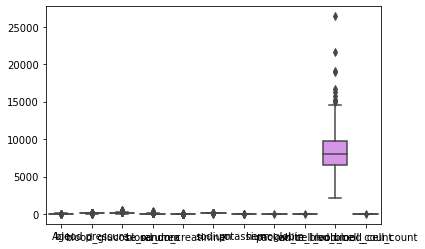

In [475]:
#box plot num columns
sns.boxplot(data = num_col)

In [476]:
# columns which has less  outliers  replacing them nan values with mean.


df[['blood pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','red_blood_cell_count']]=df[['blood pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','red_blood_cell_count']].fillna(df[['blood pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','red_blood_cell_count']].mean()[0])
df

,Age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,0.0,1.0,1.0,121.000000,...,44.0,7800.0,5.200000,0.0,0.0,1.0,0.0,1.0,1.0,0
1,7.0,50.0,1.020,4.0,0.0,0,0.0,1.0,1.0,76.469072,...,38.0,6000.0,76.469072,1.0,1.0,1.0,0.0,1.0,1.0,0
2,62.0,80.0,1.010,2.0,3.0,0,0.0,1.0,1.0,423.000000,...,31.0,7500.0,76.469072,1.0,0.0,1.0,1.0,1.0,0.0,0
3,48.0,70.0,1.005,4.0,0.0,0,1.0,0.0,1.0,117.000000,...,32.0,6700.0,3.900000,0.0,1.0,1.0,1.0,0.0,0.0,0
4,51.0,80.0,1.010,2.0,0.0,0,0.0,1.0,1.0,106.000000,...,35.0,7300.0,4.600000,1.0,1.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0.0,1.0,1.0,140.000000,...,47.0,6700.0,4.900000,1.0,1.0,1.0,0.0,1.0,1.0,1
396,42.0,70.0,1.025,0.0,0.0,0,0.0,1.0,1.0,75.000000,...,54.0,7800.0,6.200000,1.0,1.0,1.0,0.0,1.0,1.0,1
397,12.0,80.0,1.020,0.0,0.0,0,0.0,1.0,1.0,100.000000,...,49.0,6600.0,5.400000,1.0,1.0,1.0,0.0,1.0,1.0,1
398,17.0,60.0,1.025,0.0,0.0,0,0.0,1.0,1.0,114.000000,...,51.0,7200.0,5.900000,1.0,1.0,1.0,0.0,1.0,1.0,1


In [477]:
#column which has more outliers replace nan values with median
df["white_blood_cell_count"].fillna(df["white_blood_cell_count"].mode()[0], inplace=True)

In [489]:
df.isnull().sum()

Age                        0
blood pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [490]:
#finalized dataset
df

,Age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,0.0,1.0,1.0,121.000000,...,44.0,7800.0,5.200000,0.0,0.0,1.0,0.0,1.0,1.0,0
1,7.0,50.0,1.020,4.0,0.0,0,0.0,1.0,1.0,76.469072,...,38.0,6000.0,76.469072,1.0,1.0,1.0,0.0,1.0,1.0,0
2,62.0,80.0,1.010,2.0,3.0,0,0.0,1.0,1.0,423.000000,...,31.0,7500.0,76.469072,1.0,0.0,1.0,1.0,1.0,0.0,0
3,48.0,70.0,1.005,4.0,0.0,0,1.0,0.0,1.0,117.000000,...,32.0,6700.0,3.900000,0.0,1.0,1.0,1.0,0.0,0.0,0
4,51.0,80.0,1.010,2.0,0.0,0,0.0,1.0,1.0,106.000000,...,35.0,7300.0,4.600000,1.0,1.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0.0,1.0,1.0,140.000000,...,47.0,6700.0,4.900000,1.0,1.0,1.0,0.0,1.0,1.0,1
396,42.0,70.0,1.025,0.0,0.0,0,0.0,1.0,1.0,75.000000,...,54.0,7800.0,6.200000,1.0,1.0,1.0,0.0,1.0,1.0,1
397,12.0,80.0,1.020,0.0,0.0,0,0.0,1.0,1.0,100.000000,...,49.0,6600.0,5.400000,1.0,1.0,1.0,0.0,1.0,1.0,1
398,17.0,60.0,1.025,0.0,0.0,0,0.0,1.0,1.0,114.000000,...,51.0,7200.0,5.900000,1.0,1.0,1.0,0.0,1.0,1.0,1


In [491]:
#seperating independent and dependent features

X = df.drop('class', axis =1)
y = df['class']

In [493]:
# spliting train test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2,random_state=10)

In [498]:
y_train

303    1
349    1
149    0
100    0
175    0
      ..
369    1
320    1
15     0
125    0
265    1
Name: class, Length: 320, dtype: int64

In [512]:
#Model Building
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train, y_train)

C:\Users\91932\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [514]:
pred = lor.predict(X_test)
pred2 = lor.predict(X_train)
#accuracy score
from sklearn.metrics import accuracy_score
print("Test accuracy : ",accuracy_score(y_test,pred)*100)
print("Training accuracy : ",accuracy_score(y_train,pred2)*100)

Test accuracy :  92.5
Training accuracy :  93.4375


In [504]:
#Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [511]:
y_pred = svc.predict(X_test)
y_pred2 = svc.predict(X_train)
#accuracy_score
from sklearn.metrics import accuracy_score
print("Test accuracy :",accuracy_score(y_test,y_pred)*100)
print("Training accuracy :",accuracy_score(y_train,y_pred2)*100)

Test accuracy : 70.0
Training accuracy : 66.25


In [515]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [517]:
y_pred = dtc.predict(X_test)
y_pred2 = dtc.predict(X_train)
from sklearn.metrics import accuracy_score
print("Test_accuracy : ",accuracy_score(y_test,y_pred)*100)
print("Train accuracy : ",accuracy_score(y_train,pred2)*100)

Test_accuracy :  100.0
Train accuracy :  93.4375
